# Final Project

# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 


# Import Data Files

In [2]:
df=pd.read_csv("C:/Users/Manikata/OneDrive/Desktop/ML_case_study.csv")
colleges=pd.read_csv("C:/Users/Manikata/OneDrive/Desktop/Colleges.csv")
cities=pd.read_csv("C:/Users/Manikata/OneDrive/Desktop/cities.csv")

In [3]:
df.head()

,College,City,Role,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC
0,SVNIT Surat,Asansol,Manager,55523.0,3,66,19,71406.58
1,NIT Bhopal,Ajmer,Executive,57081.0,1,84,18,68005.87
2,"IEM, Kolkata",Rajpur Sonarpur,Executive,60347.0,2,52,28,76764.02
3,"KIIT, Bhubaneswar",Ajmer,Executive,49010.0,2,81,33,82092.39
4,DTU,Durgapur,Executive,57879.0,4,74,32,73878.10


In [4]:
colleges.head()

,Tier 1,Tier 2,Tier 3
0,IIT Bombay,IIIT Bangalore,"Ramaiah Institute of Technology, Bengaluru"
1,IIT Delhi,IIIT Delhi,TIET/Thapar University
2,IIT Kharagpur,IGDTUW,Manipal Main Campus
3,IIT Madras,NIT Calicut,VIT Vellore
4,IIT Kanpur,IIITM Gwalior,SRM Main Campus


In [5]:
cities.head()

,Metrio City,non-metro cities
0,Mumbai,Dehradun
1,Delhi,Durgapur
2,Kolkata,Asansol
3,Chennai,Rourkela
4,Bangalore,Kozhikode


## Changing into Categorical variable to understandable to Machine Learning

In [6]:
Tier1 =colleges["Tier 1"].tolist()
Tier2 =colleges["Tier 2"].tolist()
Tier3 =colleges["Tier 3"].tolist()
for item in df['College']:
  if item in Tier1:
    df["College"].replace(item, 1, inplace=True)
  elif item in Tier2:
    df["College"].replace(item, 2, inplace=True) 
  elif item in Tier3:
    df["College"].replace(item, 3, inplace=True)

In [7]:
metro_city = cities["Metrio City"].tolist()
non_metro_city = cities["non-metro cities"].tolist()
for item in df['City']:
    if item in metro_city: df["City"].replace(item, 1, inplace=True)
    elif item in non_metro_city:
        df["City"].replace(item, 0, inplace=True)

In [8]:
df = pd.get_dummies(df, columns=["Role"], drop_first = True)

In [9]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,True
1,2,0,57081.0,1,84,18,68005.87,False
2,3,0,60347.0,2,52,28,76764.02,False
3,3,0,49010.0,2,81,33,82092.39,False
4,1,0,57879.0,4,74,32,73878.10,False


In [10]:
df["Role_Manager"]=df["Role_Manager"].astype(int)


In [11]:
df.head()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
0,2,0,55523.0,3,66,19,71406.58,1
1,2,0,57081.0,1,84,18,68005.87,0
2,3,0,60347.0,2,52,28,76764.02,0
3,3,0,49010.0,2,81,33,82092.39,0
4,1,0,57879.0,4,74,32,73878.10,0


## Data Preprocessing and Analysis

In [12]:
df.shape

(1589, 8)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1589 entries, 0 to 1588
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   College              1589 non-null   int64  
 1   City                 1589 non-null   int64  
 2   Previous CTC         1589 non-null   float64
 3   Previous job change  1589 non-null   int64  
 4   Graduation Marks     1589 non-null   int64  
 5   EXP (Month)          1589 non-null   int64  
 6   CTC                  1589 non-null   float64
 7   Role_Manager         1589 non-null   int32  
dtypes: float64(2), int32(1), int64(5)
memory usage: 93.2 KB


In [14]:
df.columns

Index(['College', 'City', 'Previous CTC', 'Previous job change',
       'Graduation Marks', 'EXP (Month)', 'CTC', 'Role_Manager'],
      dtype='object')

In [15]:
# No missing value in this data so there is no need to impletation 

In [16]:
#  check outliers and  correlation 

In [17]:
df.describe()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
count,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000,1589.000000
mean,1.975456,0.514160,55518.453744,2.528634,59.855255,39.044682,75353.278798,0.206419
std,0.838330,0.499957,6655.218445,1.123918,14.935139,14.108875,12587.288237,0.404862
min,1.000000,0.000000,36990.000000,1.000000,35.000000,18.000000,53020.320000,0.000000
25%,1.000000,0.000000,50518.000000,2.000000,46.000000,26.000000,66902.350000,0.000000
50%,2.000000,1.000000,55291.000000,3.000000,60.000000,39.000000,73028.670000,0.000000
75%,3.000000,1.000000,60109.000000,4.000000,73.000000,51.000000,80588.670000,0.000000
max,3.000000,1.000000,77911.000000,4.000000,85.000000,64.000000,123416.990000,1.000000


In [18]:
df.corr()

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),CTC,Role_Manager
College,1.000000,-0.014946,0.041979,-0.055060,0.003539,0.011752,-0.029592,-0.014749
City,-0.014946,1.000000,0.004644,0.051670,-0.018616,-0.023613,-0.020365,-0.048671
Previous CTC,0.041979,0.004644,1.000000,0.005756,-0.032976,0.119163,0.258000,0.012321
Previous job change,-0.055060,0.051670,0.005756,1.000000,0.019267,0.023488,0.011370,-0.017150
Graduation Marks,0.003539,-0.018616,-0.032976,0.019267,1.000000,-0.057061,-0.005450,0.017858
EXP (Month),0.011752,-0.023613,0.119163,0.023488,-0.057061,1.000000,0.301115,-0.026751
CTC,-0.029592,-0.020365,0.258000,0.011370,-0.005450,0.301115,1.000000,0.621311
Role_Manager,-0.014749,-0.048671,0.012321,-0.017150,0.017858,-0.026751,0.621311,1.000000


## univariate and bivariate visualisations

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew 

In [20]:
# Set color and style
sns.set(style="darkgrid")
sns.set_palette('muted')

<Figure size 1200x800 with 0 Axes>

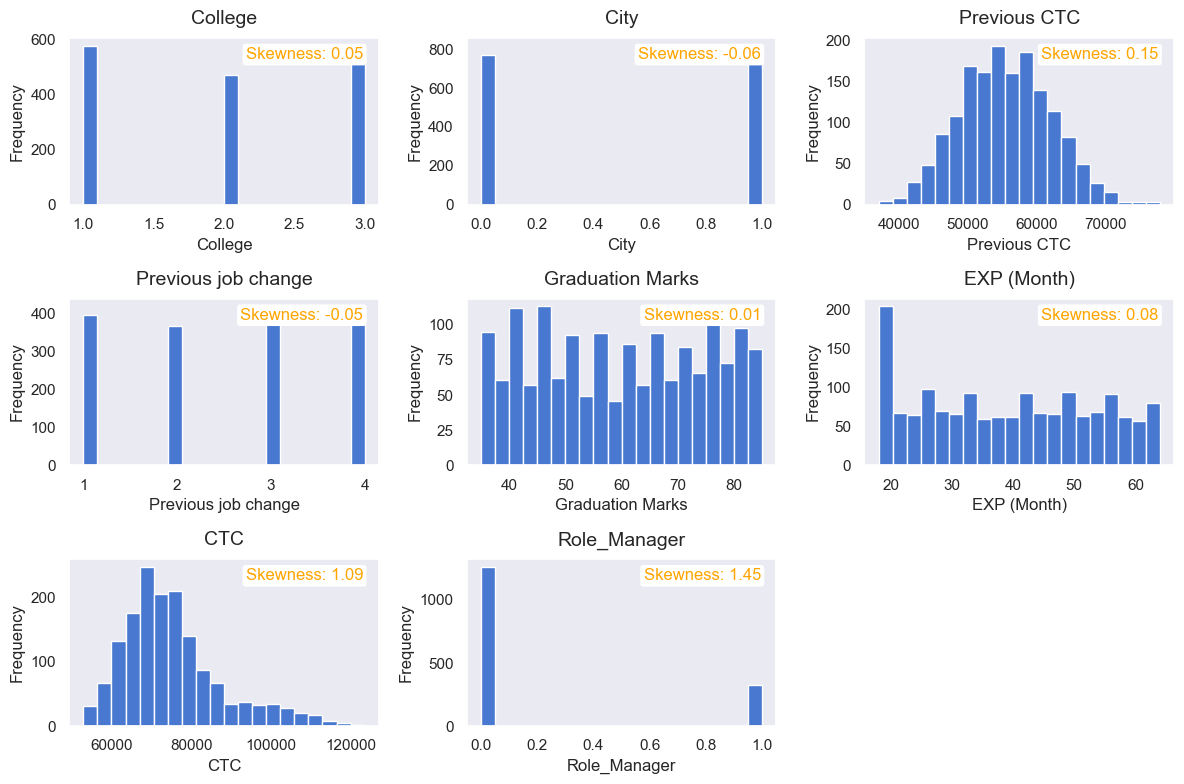

In [21]:
# plot histogram with skewness
plt.figure(figsize=(12,8))
ax =df.hist(figsize=(12,8), bins = 20 , grid=False)

#flatten the ax array

ax = ax.ravel()

for i, column in enumerate(df.columns):
    ax[i].set_ylabel("Frequency", fontsize=12)
    ax[i].set_xlabel(column, fontsize=12)
    ax[i].set_title(column, fontsize=14, pad=10)
    
# Calculate skewness
    skewness = skew(df[column])
    
# Add skewness value to the plot
    ax[i].text(
        0.95, 0.9, f"Skewness: {skewness:.2f}", 
        transform=ax[i].transAxes, ha="right", va="center", color="orange",
        fontsize=12, bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.2')
    )
    
plt.tight_layout()
plt.show()

kewness is acceptable  when it is  comparing  with the buisness domain 

## corr Visualization with style and color 

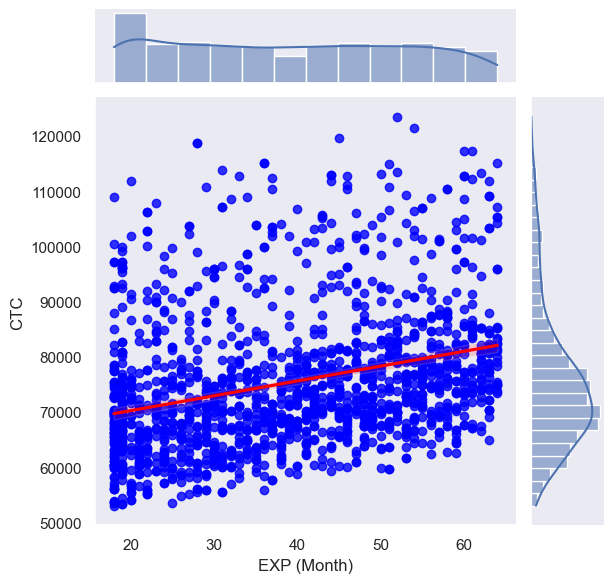

In [22]:
sns.set(style="dark")
sns.jointplot(x="EXP (Month)", y="CTC", data=df, kind='reg', line_kws={"color": "red"}, scatter_kws={"color": "blue"})

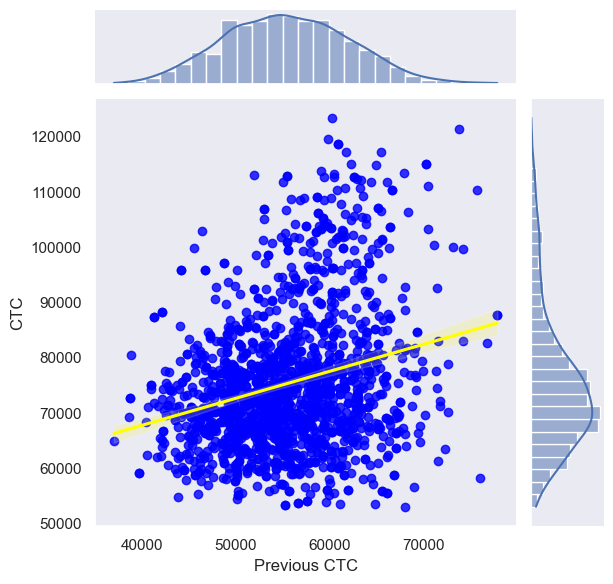

In [23]:
sns.set(style="dark")
sns.jointplot(x="Previous CTC", y="CTC", data=df, kind='reg', line_kws={"color": "yellow"}, scatter_kws={"color": "blue"})

In [24]:
# Computes feature correlation
df_corr = df.corr(method="pearson")

In [25]:
# Correlation evaluates the linear relationship b/w two variables
# Create labels for the correlation matrix
labels = np.where(np.abs(df_corr)>0.45, "High",
                  np.where(np.abs(df_corr)>0.3, "Med",
                           np.where(np.abs(df_corr)>0.15, "Low", "")))

<Axes: >

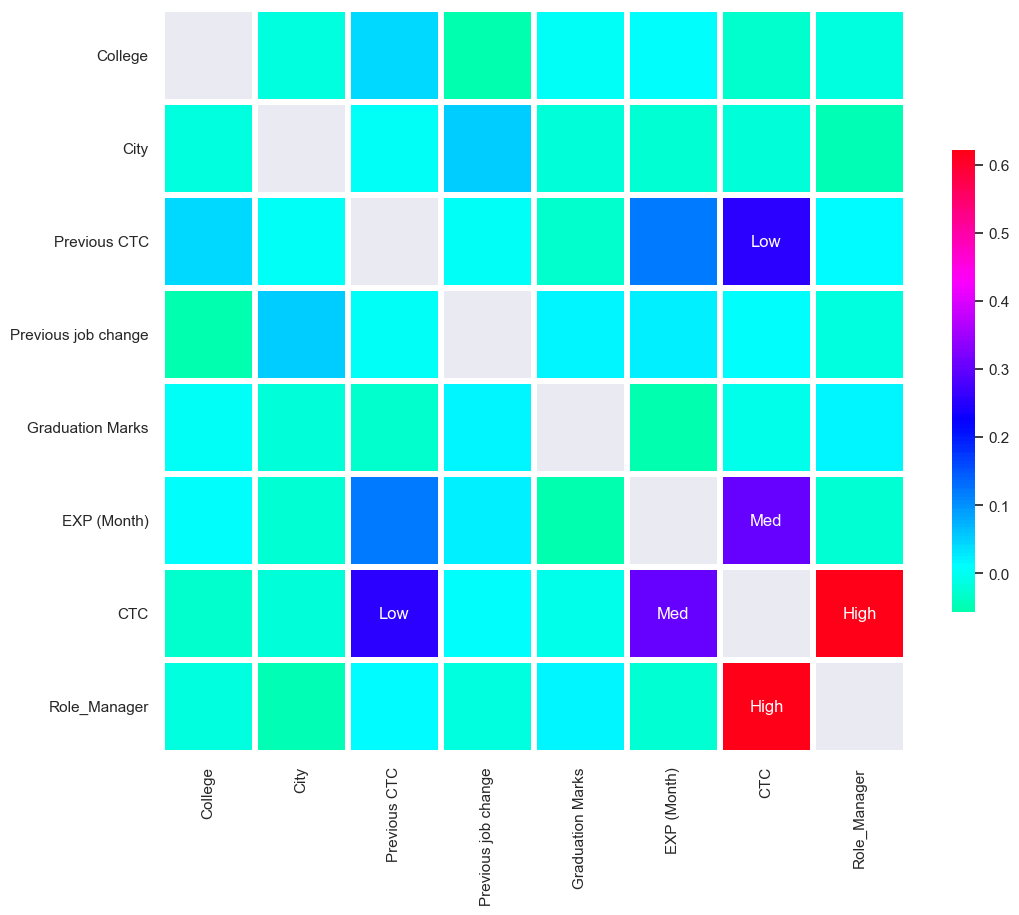

In [26]:
# Plot correlation matrix
plt.figure(figsize=(12, 12))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=4,
            cmap="hsv", cbar_kws={"shrink": 0.5})

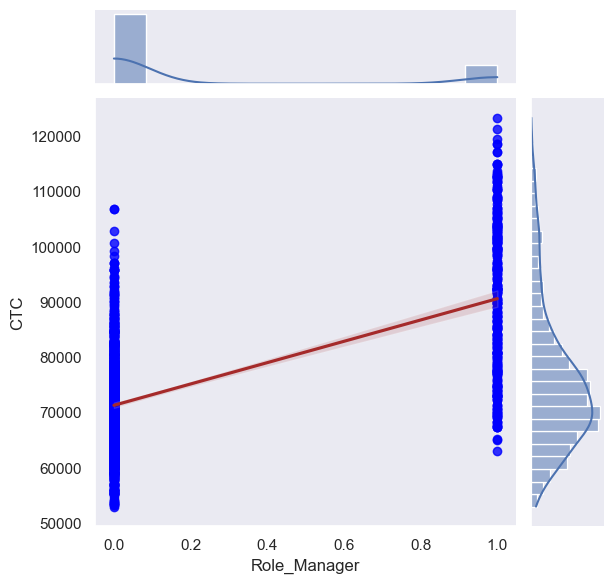

In [27]:
sns.set(style="dark")
sns.jointplot(x="Role_Manager", y="CTC", data=df, kind='reg', line_kws={"color": "brown"}, scatter_kws={"color": "blue"})

<Axes: xlabel='College', ylabel='count'>

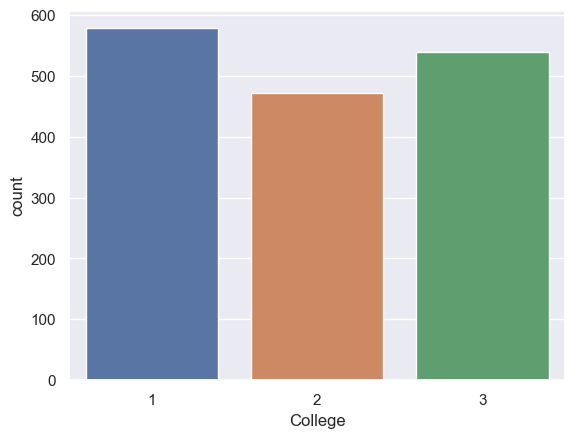

In [28]:
sns.set(style="darkgrid")

sns.countplot(x='College',data=df)

<Axes: xlabel='City', ylabel='count'>

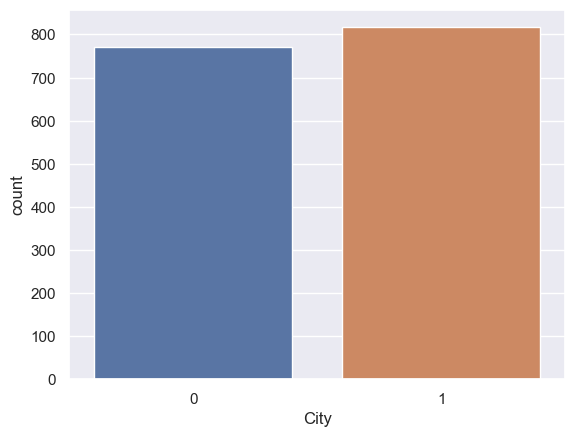

In [29]:
sns.countplot(x='City',data=df)

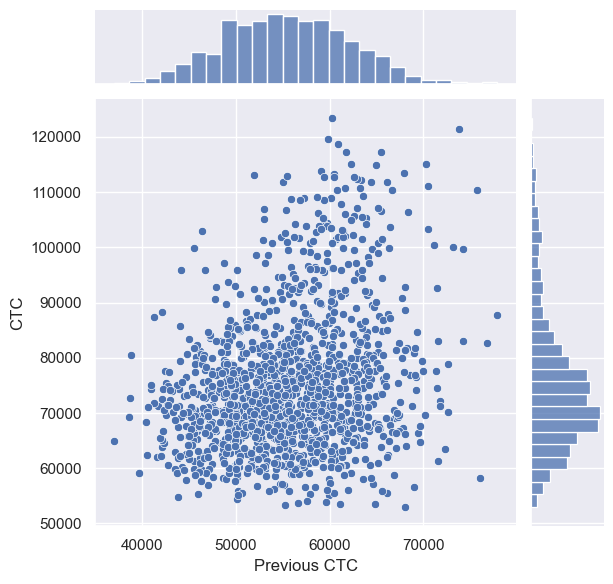

In [30]:
sns.jointplot(x=df['Previous CTC'],y=df['CTC'],data=df)

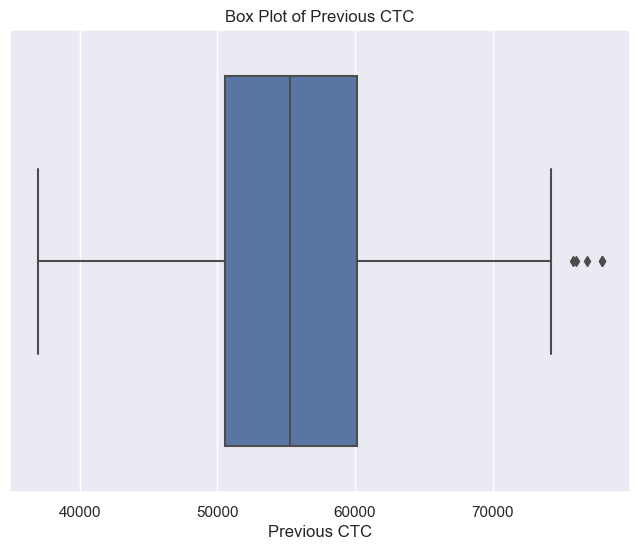

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Previous CTC'])
plt.title("Box Plot of Previous CTC")
plt.xlabel("Previous CTC")
plt.show()

<Axes: xlabel='CTC'>

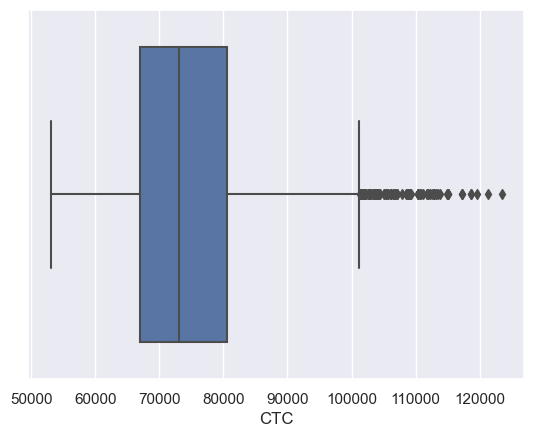

In [32]:
sns.boxplot(x=df['CTC'])

In [33]:
# percentile 
np.percentile(df.CTC,[99])

array([112826.26])

this look like CTC have no Outliers

## Multi Variate

D:\anaconda\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


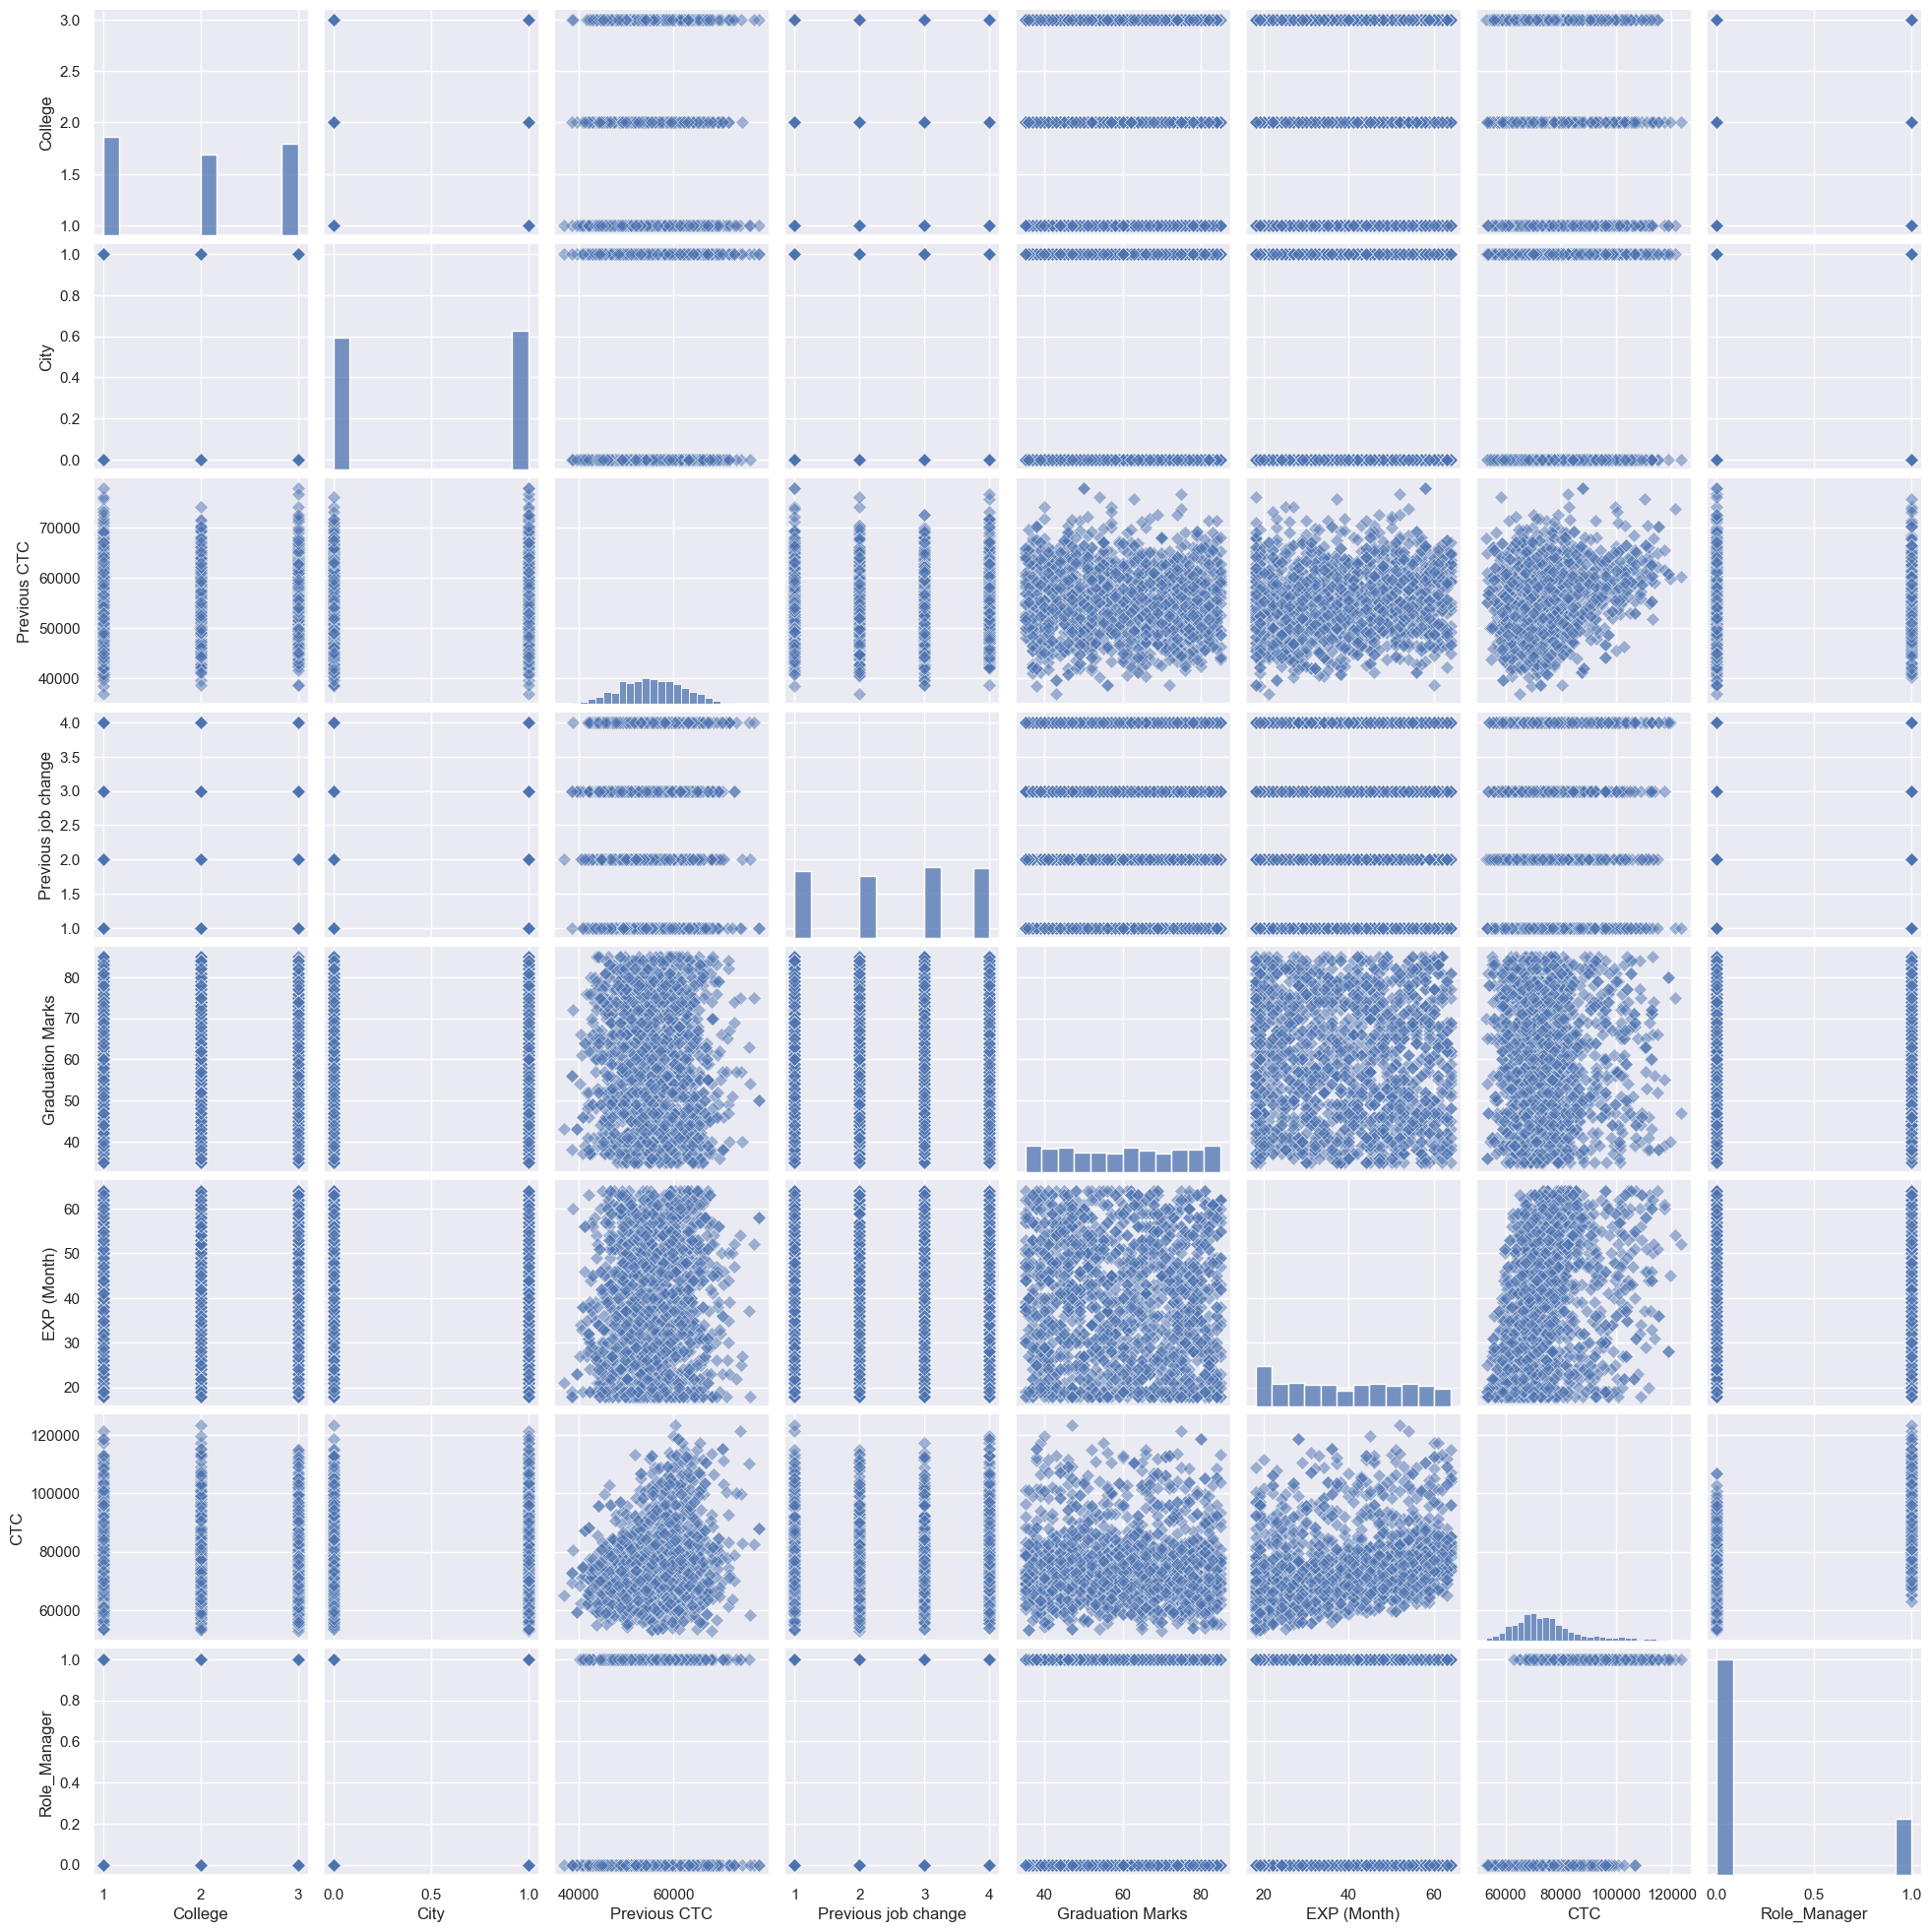

In [34]:
 # Set style and create a pair plot with format   
sns.set_style("darkgrid")
sns.pairplot(df, diag_kind="auto", markers="D", plot_kws={"alpha": 0.5, "s": 50})
plt.show()

## Making a Data Frame  for model 

In [35]:
#To create a dataframe to compare model accuracy, empty lists are created
models=[]
root_mean_squared_error=[]
r2_s=[] 
r2_r=[]

## linear Regression Model 

In [36]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize lists
models = []
root_mean_squared_error = []
r2_s = []
r2_r = []

# Linear Regression Model With import library 
X_multi = df.drop("CTC", axis=1)
y_multi = df['CTC']

X_multi_cons = sm.add_constant(X_multi)

lm_multi = sm.OLS(y_multi, X_multi_cons).fit()
print(lm_multi.summary())

lm_multi2 = LinearRegression()
lm_multi2.fit(X_multi, y_multi)
print(lm_multi2.intercept_, lm_multi2.coef_)

# Append model results to lists
models.append("Linear Regression")
root_mean_squared_error.append(np.sqrt(mean_squared_error(y_multi, lm_multi2.predict(X_multi))))
r2_s.append(r2_score(y_multi, lm_multi2.predict(X_multi)))
r2_r.append(lm_multi2.score(X_multi, y_multi))


                            OLS Regression Results                            
Dep. Variable:                    CTC   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     259.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):          4.70e-257
Time:                        08:03:14   Log-Likelihood:                -16648.
No. Observations:                1589   AIC:                         3.331e+04
Df Residuals:                    1581   BIC:                         3.335e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3.842e+04   2

In [37]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_multi, y_multi, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1271, 7) (318, 7) (1271,) (318,)


In [38]:
X_train.head(15)

,College,City,Previous CTC,Previous job change,Graduation Marks,EXP (Month),Role_Manager
1062,1,0,61410.0,4,83,59,1
215,1,1,59781.0,1,46,41,0
654,1,0,62521.0,1,70,59,0
55,1,0,66624.0,1,63,58,1
1187,3,0,54621.0,2,52,62,0
581,1,0,52782.0,1,56,19,0
798,3,0,55987.0,4,50,58,0
863,1,1,45321.0,1,65,36,0
279,1,1,49646.0,1,59,51,0
1432,3,0,59293.0,1,81,64,1


In [39]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import numpy as np

# Define an empty list for models
models = []

# Define empty lists for metrics
r2_s = []
r2_r = []
root_mean_squared_error = []

# Linear Regression and Prediction
lm_a = LinearRegression()
lm_a.fit(X_train, y_train)
y_test_pred = lm_a.predict(X_test)
y_train_pred = lm_a.predict(X_train)

# Calculate R-squared scores
test_r2 = r2_score(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate Mean Squared Errors
test_mse = mean_squared_error(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)

# Print R-squared scores and MSE
print("Test R-squared Score:", test_r2)
print("Train R-squared Score:", train_r2)
print("Test Mean Squared Error:", test_mse)
print("Train Mean Squared Error:", train_mse)

# Append model name to the list
models.append('Linear Regression 2')

# Update the results lists with calculated metrics
r2_s.append(test_r2)
r2_r.append(train_r2)
root_mean_squared_error.append(np.sqrt(test_mse))

Test R-squared Score: 0.5355989894790041
Train R-squared Score: 0.5331293335456955
Test Mean Squared Error: 68909870.69952635
Train Mean Squared Error: 75086299.73658578


## Ridge Regression 

In [40]:
from sklearn import preprocessing
from sklearn.linear_model import Ridge

# Standardize the features using StandardScaler
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Create a Ridge regression model with fixed alpha of 0.5
lm_r = Ridge(alpha=0.5)
lm_r.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Ridge model
r2_ridge_test = r2_score(y_test, lm_r.predict(X_test_s))
print("Test R-squared Score (Ridge):", r2_ridge_test)

# Calculate Mean Squared Error for the test set using the Ridge model
mse_ridge_test = mean_squared_error(y_test, lm_r.predict(X_test_s))
print("Mean Squared Error (Test) - Ridge Regression:", mse_ridge_test)

# Calculate R-squared score on the train set using the Ridge model
r2_ridge_train = r2_score(y_train, lm_r.predict(X_train_s))

# Append model name to the list
models.append('Ridge Regression')

# Update the results lists with calculated metrics
r2_s.append(r2_ridge_test)
r2_r.append(r2_ridge_train)
root_mean_squared_error.append(np.sqrt(mse_ridge_test))

Test R-squared Score (Ridge): 0.5355848845406523
Mean Squared Error (Test) - Ridge Regression: 68911963.65250453


Max Test R-squared Score: 0.5258211812515299
Selected Alpha: 0.41320124001153363
Test R-squared Score (Ridge Best): 0.5355873428938387
Train R-squared Score (Ridge Best): 0.5331292806322698
Test Mean Squared Error (Ridge Best): 68911598.87121344
Train Mean Squared Error (Ridge Best): 75086308.24659427


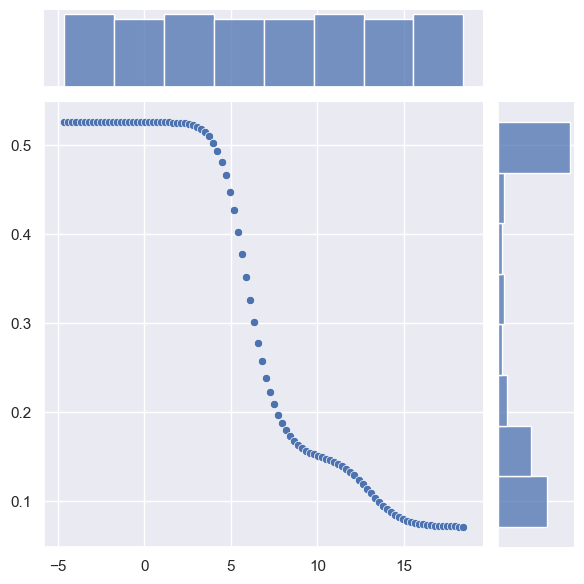

In [41]:
import numpy as np
from sklearn.model_selection import validation_curve
from sklearn.metrics import r2_score, mean_squared_error

param_range = np.logspace(-2, 8, 100)

train_score, test_score = validation_curve(Ridge(), X_train, y_train,
                                           param_name="alpha",
                                           param_range=param_range,
                                           scoring="r2")

train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)

print("Max Test R-squared Score:", max(test_mean))

sns.jointplot(x=np.log(param_range), y=test_mean)

best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

lm_r_best = Ridge(alpha=selected_alpha)
lm_r_best.fit(X_train_s, y_train)

# Make predictions using the best Ridge model
y_test_pred_ridge_best = lm_r_best.predict(X_test_s)
y_train_pred_ridge_best = lm_r_best.predict(X_train_s)

# Calculate R-squared scores
test_r2_ridge_best = r2_score(y_test, y_test_pred_ridge_best)
train_r2_ridge_best = r2_score(y_train, y_train_pred_ridge_best)
# Calculate Mean Squared Errors
test_mse_ridge_best = mean_squared_error(y_test, y_test_pred_ridge_best)
train_mse_ridge_best = mean_squared_error(y_train, y_train_pred_ridge_best)

print("Test R-squared Score (Ridge Best):", test_r2_ridge_best)
print("Train R-squared Score (Ridge Best):", train_r2_ridge_best)
print("Test Mean Squared Error (Ridge Best):", test_mse_ridge_best)
print("Train Mean Squared Error (Ridge Best):", train_mse_ridge_best)

# Append model name to the list
models.append('Ridge Regression (Best Alpha)')

# Update the results lists with calculated metrics
r2_s.append(test_r2_ridge_best)
r2_r.append(train_r2_ridge_best)
root_mean_squared_error.append(np.sqrt(test_mse_ridge_best))


## Lasso Regression

In [42]:
# import Lasso 
from sklearn.linear_model import Lasso

# Create a Lasso regression model with alpha=0.5
lm_l = Lasso(alpha=0.5)

# Fit the Lasso regression model on the scaled training data
lm_l.fit(X_train_s, y_train)

# Calculate R-squared score on the test set using the Lasso model
r2_lasso_test = r2_score(y_test, lm_l.predict(X_test_s))
print("R-squared Score (Test) - Lasso Regression:", r2_lasso_test)

r2_lasso_train = r2_score(y_train, lm_l.predict(X_train_s))

# Calculate Mean Squared Error for the test set using the Lasso model
mse_lasso_test = mean_squared_error(y_test, lm_l.predict(X_test_s))
print("Mean Squared Error (Test) - Lasso Regression:", mse_lasso_test)

# Perform GridSearchCV for Lasso regression
param_range = np.logspace(-2, 8, 100)
train_score, test_score = validation_curve(Lasso(), X_train, y_train, param_name="alpha", param_range=param_range, scoring="r2")
train_mean = np.mean(train_score, axis=1)
test_mean = np.mean(test_score, axis=1)
best_alpha_idx = np.where(test_mean == max(test_mean))[0][0]
selected_alpha = param_range[best_alpha_idx]
print("Selected Alpha:", selected_alpha)

# Create a Lasso regression model with the selected alpha
lm_l_best = Lasso(alpha=selected_alpha)

# Fit the Lasso regression model on the scaled training data
lm_l_best.fit(X_train_s, y_train)
# Calculate R-squared score on the test set using the optimized Lasso model
r2_lasso_best_test = r2_score(y_test, lm_l_best.predict(X_test_s))
print("R-squared Score (Test) - Optimized Lasso Regression:", r2_lasso_best_test)

# Calculate Mean Squared Error for the test set using the optimized Lasso model
mse_lasso_best_test = mean_squared_error(y_test, lm_l_best.predict(X_test_s))
print("Mean Squared Error (Test) - Optimized Lasso Regression:", mse_lasso_best_test)

# Calculate R-squared score on the train set using the optimized Lasso model
r2_lasso_best_train = r2_score(y_train, lm_l_best.predict(X_train_s))

# Append model name to the list
models.append('Lasso Regression (Optimized Alpha)')
models.append('Lasso Regression')

# Update the results lists with calculated metrics
r2_s.extend([r2_lasso_best_test,r2_lasso_test])
r2_r.extend([r2_lasso_best_train,r2_lasso_train])
root_mean_squared_error.extend([np.sqrt(mse_lasso_best_test),(np.sqrt(mse_lasso_test))])

R-squared Score (Test) - Lasso Regression: 0.5356055546226256
Mean Squared Error (Test) - Lasso Regression: 68908896.5345529
Selected Alpha: 8.497534359086439
R-squared Score (Test) - Optimized Lasso Regression: 0.5357073854860221
Mean Squared Error (Test) - Optimized Lasso Regression: 68893786.42180356


## Decision Tree Bagging Regression 

In [43]:
# import tree 

from sklearn import tree
from sklearn.metrics import r2_score

# Create a DecisionTreeRegressor
clftree = tree.DecisionTreeRegressor()

# Import Bagging Regressor 
from sklearn.ensemble import BaggingRegressor

# Rest of your code
clftree = tree.DecisionTreeRegressor()
bag_clf = BaggingRegressor(estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)

# Create a BaggingRegressor with DecisionTreeRegressor as the base estimator
bag_clf = BaggingRegressor(estimator=clftree, n_estimators=1000, bootstrap=True, n_jobs=-1, random_state=42)

# Fit the BaggingRegressor on the training data
bag_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the BaggingRegressor
r2_bagging_test = r2_score(y_test, bag_clf.predict(X_test))
print("R-squared Score (Test) - Bagging Regressor:", r2_bagging_test)

R-squared Score (Test) - Bagging Regressor: 0.6592849814181122


In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# GridSearch for BaggingRegressor
param_grid_bagging = {
    'n_estimators': [100, 250, 500, 1000],
    'max_samples': [0.5, 0.7, 0.8],
    'max_features': [0.5, 0.7, 0.8]
}

grid_search_bagging = GridSearchCV(estimator=BaggingRegressor(estimator=clftree, random_state=42),
                                   param_grid=param_grid_bagging,
                                   scoring='r2',
                                   n_jobs=-1,
                                   cv=5)

grid_search_bagging.fit(X_train, y_train)

best_bagging_model = grid_search_bagging.best_estimator_

# Calculate R-squared score and MSE on the test set using the best BaggingRegressor
y_test_pred_bagging = best_bagging_model.predict(X_test)
r2_bagging_best_test = r2_score(y_test, y_test_pred_bagging)
mse_bagging_best_test = mean_squared_error(y_test, y_test_pred_bagging)

print("R-squared Score (Test) - Best Bagging Regressor:", r2_bagging_best_test)
print("Mean Squared Error (Test) - Best Bagging Regressor:", mse_bagging_best_test)

y_train_pred_bagging = best_bagging_model.predict(X_train)
r2_bagging_best_train = r2_score(y_train, y_train_pred_bagging)

# Append model name to the list
models.append('Best Bagging Regressor') 
# Update the results lists with calculated metrics
r2_s.append(r2_bagging_best_test)
r2_r.append(r2_bagging_best_train)
root_mean_squared_error.append(np.sqrt(mse_bagging_best_test))


R-squared Score (Test) - Best Bagging Regressor: 0.5884009874713885
Mean Squared Error (Test) - Best Bagging Regressor: 61074877.29533487


## Random Forest Regression 

In [45]:
# import Random Forest Regression 
from sklearn.ensemble import RandomForestRegressor

# Create a RandomForestRegressor with 1000 estimators
rf_clf = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)

# Calculate R-squared score on the test and train set using the RandomForestRegressor
r2_rf_test = r2_score(y_test, rf_clf.predict(X_test))
r2_rf_train = r2_score(y_train, rf_clf.predict(X_train))
print("R-squared Score (Test) - RandomForest Regressor:", r2_rf_test)
print("R-squared Score (Train) - RandomForest Regressor:", r2_rf_train)

# Perform GridSearchCV for RandomForestRegressor
rf_clf = RandomForestRegressor(n_estimators=1000, random_state=42)
params_grid = {
    "max_features": [4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": [2, 3, 10]
}
grid_search = GridSearchCV(rf_clf, params_grid, n_jobs=-1, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
cvrf_clf = grid_search.best_estimator_

# Calculate R-squared score on the test and train set using the optimized RandomForestRegressor
r2_cv_rf_test = r2_score(y_test, cvrf_clf.predict(X_test))
r2_cv_rf_train = r2_score(y_train, cvrf_clf.predict(X_train))
print("R-squared Score (Test) - Optimized RandomForest Regressor:", r2_cv_rf_test)
print("R-squared Score (Train) - Optimized RandomForest Regressor:", r2_cv_rf_train)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Fit the RandomForestRegressor on the training data
rf_clf.fit(X_train, y_train)
# Calculate Mean Squared Error for the test set using the RandomForestRegressor
mse_rf_test = mean_squared_error(y_test, rf_clf.predict(X_test))
print("Mean Squared Error (Test) - RandomForest Regressor:", mse_rf_test)

# Calculate Mean Squared Error for the train set using the RandomForestRegressor
mse_rf_train = mean_squared_error(y_train, rf_clf.predict(X_train))
print("Mean Squared Error (Train) - RandomForest Regressor:", mse_rf_train)

# Calculate Mean Squared Error for the test set using the optimized RandomForestRegressor
mse_cv_rf_test = mean_squared_error(y_test, cvrf_clf.predict(X_test))
print("Mean Squared Error (Test) - Optimized RandomForest Regressor:", mse_cv_rf_test)

# Calculate Mean Squared Error for the train set using the optimized RandomForestRegressor
mse_cv_rf_train = mean_squared_error(y_train, cvrf_clf.predict(X_train))
print("Mean Squared Error (Train) - Optimized RandomForest Regressor:", mse_cv_rf_train)

# Append model names to the list
models.append('RandomForest Regressor')
models.append('Optimized RandomForest Regressor')

# Update the results lists with calculated metrics for both models
r2_s.extend([r2_rf_test, r2_cv_rf_test])
r2_r.extend([r2_rf_train, r2_cv_rf_train])
root_mean_squared_error.extend([np.sqrt(mse_rf_test), np.sqrt(mse_cv_rf_test)])


R-squared Score (Test) - RandomForest Regressor: 0.6607840939246611
R-squared Score (Train) - RandomForest Regressor: 0.9507120969482583
R-squared Score (Test) - Optimized RandomForest Regressor: 0.6618523327295343
R-squared Score (Train) - Optimized RandomForest Regressor: 0.951899680498654
Mean Squared Error (Test) - RandomForest Regressor: 50334352.63340681
Mean Squared Error (Train) - RandomForest Regressor: 7926919.654295916
Mean Squared Error (Test) - Optimized RandomForest Regressor: 50175842.64688151
Mean Squared Error (Train) - Optimized RandomForest Regressor: 7735921.8880312815


## Gradient Boosting Regression 

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor
gbc_clf = GradientBoostingRegressor()

# Fit the GradientBoostingRegressor on the training data
gbc_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the GradientBoostingRegressor
r2_gbc_test = r2_score(y_test, gbc_clf.predict(X_test))
print("R-squared Score (Test) - GradientBoosting Regressor:", r2_gbc_test)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor
mse_gbc_test = mean_squared_error(y_test, gbc_clf.predict(X_test))
print("Mean Squared Error (Test) - GradientBoosting Regressor:", mse_gbc_test)

# Create a GradientBoostingRegressor with custom parameters
gbc_clf2 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=1000, max_depth=1)

# Fit the GradientBoostingRegressor with custom parameters on the training data
gbc_clf2.fit(X_train, y_train)

# Calculate R-squared score on the train set using the GradientBoostingRegressor with custom parameters
r2_gbc_train2 = r2_score(y_train, gbc_clf2.predict(X_train))
print("R-squared Score (Train) - Custom GradientBoosting Regressor:", r2_gbc_train2)

# Calculate R-squared score on the test set using the GradientBoostingRegressor with custom parameters
r2_gbc_test2 = r2_score(y_test, gbc_clf2.predict(X_test))
print("R-squared Score (Test) - Custom GradientBoosting Regressor:", r2_gbc_test2)

# Calculate Mean Squared Error for the test set using the GradientBoostingRegressor with custom parameters
mse_gbc_test2 = mean_squared_error(y_test, gbc_clf2.predict(X_test))
print("Mean Squared Error (Test) - Custom GradientBoosting Regressor:", mse_gbc_test2)

# Define parameter grid for GridSearchCV
param_grid_gbc = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [1, 3, 5]
}

# Create GridSearchCV
grid_search_gbc = GridSearchCV(estimator=GradientBoostingRegressor(),
                                param_grid=param_grid_gbc,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_gbc.fit(X_train, y_train)

# Get best GradientBoostingRegressor model from GridSearchCV
best_gbc_model = grid_search_gbc.best_estimator_

# Calculate R-squared score on the test set using the best GradientBoostingRegressor
r2_best_gbc_test = r2_score(y_test, best_gbc_model.predict(X_test))
print("R-squared Score (Test) - Best GradientBoosting Regressor:", r2_best_gbc_test)

# Calculate Mean Squared Error for the test set using the best GradientBoostingRegressor
mse_best_gbc_test = mean_squared_error(y_test, best_gbc_model.predict(X_test))
print("Mean Squared Error (Test) - Best GradientBoosting Regressor:", mse_best_gbc_test)


# Append model names to the list
models.append('GradientBoosting Regressor')
models.append('Custom GradientBoosting Regressor')
models.append('Best GradientBoosting Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_gbc_test, r2_gbc_test2, r2_best_gbc_test])
r2_r.extend([r2_gbc_train2, r2_gbc_test2, r2_best_gbc_test])
root_mean_squared_error.extend([np.sqrt(mse_gbc_test), np.sqrt(mse_gbc_test2), np.sqrt(mse_best_gbc_test)])

R-squared Score (Test) - GradientBoosting Regressor: 0.6120780005386567
Mean Squared Error (Test) - GradientBoosting Regressor: 57561577.64254981
R-squared Score (Train) - Custom GradientBoosting Regressor: 0.5553367824664439
R-squared Score (Test) - Custom GradientBoosting Regressor: 0.5235431944604294
Mean Squared Error (Test) - Custom GradientBoosting Regressor: 70698762.7499075
R-squared Score (Test) - Best GradientBoosting Regressor: 0.6120729374439424
Mean Squared Error (Test) - Best GradientBoosting Regressor: 57562328.92687993


## ADA Boosting Regression 

R-squared Score (Train) - AdaBoost Regressor: 0.6274070996901424
R-squared Score (Test) - AdaBoost Regressor: 0.5997246162370108
R-squared Score (Test) - Best AdaBoost Regressor: 0.6121530271039641
Mean Squared Error (Test) - Best AdaBoost Regressor: 57550444.86980119
Mean Squared Error (Train) - AdaBoost Regressor: 59923709.50366408
Mean Squared Error (Test) - AdaBoost Regressor: 59394627.303602375


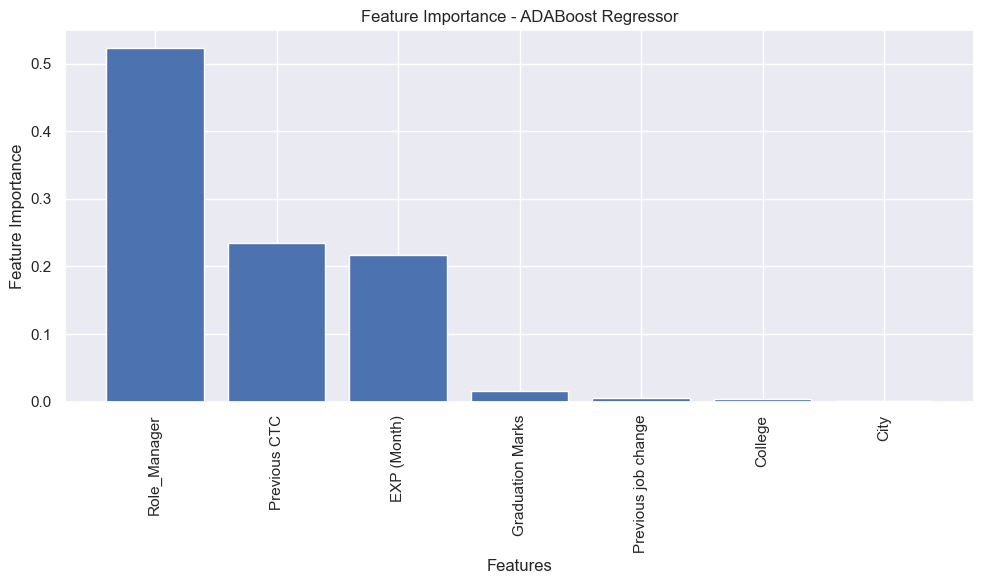

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with custom parameters
ada_clf = AdaBoostRegressor(learning_rate=0.05, n_estimators=1000)

# Fit the AdaBoostRegressor on the training data
ada_clf.fit(X_train, y_train)

# Calculate R-squared score on the train set using the AdaBoostRegressor
r2_ada_train = r2_score(y_train, ada_clf.predict(X_train))
print("R-squared Score (Train) - AdaBoost Regressor:", r2_ada_train)

# Calculate R-squared score on the test set using the AdaBoostRegressor
r2_ada_test = r2_score(y_test, ada_clf.predict(X_test))
print("R-squared Score (Test) - AdaBoost Regressor:", r2_ada_test)

# Define parameter grid for GridSearchCV
param_grid_ada = {
    'n_estimators': [100, 250, 500],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create GridSearchCV
grid_search_ada = GridSearchCV(estimator=AdaBoostRegressor(),
                                param_grid=param_grid_ada,
                                scoring='r2',
                                n_jobs=-1,
                                cv=5)

# Fit GridSearchCV on the training data
grid_search_ada.fit(X_train, y_train)

# Get best AdaBoostRegressor model from GridSearchCV
best_ada_model = grid_search_ada.best_estimator_

# Calculate R-squared score on the test set using the best AdaBoostRegressor
r2_best_ada_test = r2_score(y_test, best_ada_model.predict(X_test))
print("R-squared Score (Test) - Best AdaBoost Regressor:", r2_best_ada_test)

# Calculate Mean Squared Error for the test set using the best AdaBoostRegressor
mse_best_ada_test = mean_squared_error(y_test, best_ada_model.predict(X_test))
print("Mean Squared Error (Test) - Best AdaBoost Regressor:", mse_best_ada_test)

# Import the mean_squared_error function
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error for the train set using the AdaBoostRegressor
mse_ada_train = mean_squared_error(y_train, ada_clf.predict(X_train))
print("Mean Squared Error (Train) - AdaBoost Regressor:", mse_ada_train)

# Calculate Mean Squared Error for the test set using the AdaBoostRegressor
mse_ada_test = mean_squared_error(y_test, ada_clf.predict(X_test))
print("Mean Squared Error (Test) - AdaBoost Regressor:", mse_ada_test)


# Get feature importances from the AdaBoostRegressor
feature_importances = ada_clf.feature_importances_

# Get the names of the features
feature_names = X_train.columns

# Sort feature importances in descending order
sorted_idx = feature_importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X_train.shape[1]), feature_importances[sorted_idx])
plt.xticks(range(X_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Feature Importance - ADABoost Regressor")
plt.tight_layout()
plt.show()

# Append model names to the list
models.append('AdaBoost Regressor')
models.append('Best AdaBoost Regressor')

# Update the results lists with calculated metrics for all models
r2_s.extend([r2_ada_test, r2_best_ada_test])
r2_r.extend([r2_ada_train, r2_best_ada_test])
root_mean_squared_error.extend([np.sqrt(mse_ada_test), np.sqrt(mse_best_ada_test)])

## XG Boosting Regression 

In [48]:
pip install xgboost


  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/24/ec/ad387100fa3cc2b9b81af0829b5ecfe75ec5bb19dd7c19d4fea06fb81802/xgboost-2.0.3-py3-none-win_amd64.whl.metadata
  Using cached xgboost-2.0.3-py3-none-win_amd64.whl.metadata (2.0 kB)
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 165.2 kB/s eta 0:10:04
   ---------------------------------------- 0.0/99.8 MB 220.2 kB/s eta 0:07:33
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ---------------------------------------- 0.0/99.8 MB 245.8 kB/s eta 0:06:46
   ----------------------------

R-squared Score (Test) - XGBoost Regressor: 0.6114577668816839


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

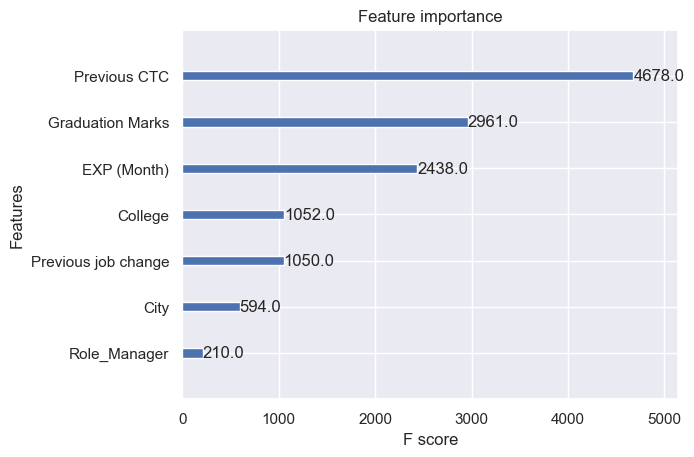

In [49]:
# import XG Bossting REgression 
import xgboost as xgb

# Create an XGBoost regressor
xgb_clf = xgb.XGBRegressor(max_depth=5, n_estimators=500, learning_rate=0.1, n_jobs=-1)

# Fit the XGBoost regressor on the training data
xgb_clf.fit(X_train, y_train)

# Calculate R-squared score on the test set using the XGBoost regressor
r2_xgb_test = r2_score(y_test, xgb_clf.predict(X_test))
print("R-squared Score (Test) - XGBoost Regressor:", r2_xgb_test)

# Append model results to lists
models.append("XGBoost Regressor")
root_mean_squared_error.append(np.sqrt(mean_squared_error(y_test, xgb_clf.predict(X_test))))
r2_s.append(r2_xgb_test)
r2_r.append(xgb_clf.score(X_train, y_train))


# Plot feature importance using XGBoost's built-in method
xgb.plot_importance(xgb_clf)

In [50]:
# Create a parameter grid for GridSearchCV
param_test1 = {
    'max_depth': range(3, 10, 2),
    'gamma': [0.1, 0.2, 0.3],
    'subsample': [0.8, 0.9],
    'colsample_bytree': [0.8, 0.9],
    'reg_alpha': [1e-2, 0.1, 1]
}

# Create a GridSearchCV instance for XGBoost regressor
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs=-1, cv=5, scoring='r2')

# Fit the GridSearchCV instance to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=0.1, ma...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=5, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=500,
                                    n_jobs=-1, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9],
                         'gamma': [0.1, 0.2, 0.3], 'max_depth': range(3, 10, 2),
                         'reg_alpha': [0.01, 0.1, 1], 'subsample': [0.8, 0.9]},
             scoring='r2')

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'max_depth': 3, 'reg_alpha': 1, 'subsample': 0.8}
R-squared Score (Test) - Best Model: 0.5884036482937329
R-squared Score (Train) - Best Model: 0.8510157575135958
Mean Squared Error (Test) - XGBoost Regressor: 57653610.648803495
Mean Squared Error (Test) - Best Model: 61074482.47077688
Mean Squared Error (Train) - Best Model: 23960973.11557532


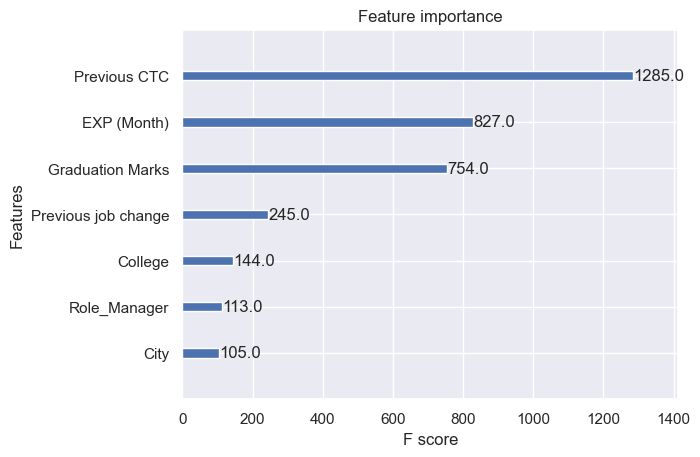

In [120]:
# Get the best parameters from GridSearchCV
best_params = grid_search.best_params_

# Print the best parameters
print("Best Parameters:", best_params)

# Get the best model with the best parameters
best_model = grid_search.best_estimator_

# Calculate R-squared score for the test set using the best model
y_pred_test = best_model.predict(X_test)
r2_test_best = r2_score(y_test, y_pred_test)
print("R-squared Score (Test) - Best Model:", r2_test_best)

# Calculate R-squared score for the train set using the best model
y_pred_train_best = best_model.predict(X_train)
r2_train_best = r2_score(y_train, y_pred_train_best)
print("R-squared Score (Train) - Best Model:", r2_train_best)

# Calculate Mean Squared Error for the test set using the XGBoost regressor
mse_xgb_test = mean_squared_error(y_test, xgb_clf.predict(X_test))
print("Mean Squared Error (Test) - XGBoost Regressor:", mse_xgb_test)

# [rest of the code]

# Calculate Mean Squared Error for the test set using the best model
mse_test_best = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (Test) - Best Model:", mse_test_best)
# Calculate Mean Squared Error for the train set using the best model
mse_train_best = mean_squared_error(y_train, y_pred_train_best)
print("Mean Squared Error (Train) - Best Model:", mse_train_best)

#plot the feature importance for the Xgboost best model
xgb.plot_importance(best_model)


# Append model names to the list
models.append('XGBoost Best Model')

# Update the results lists with calculated metrics for the best model
r2_s.append(r2_test_best)
r2_r.append(r2_train_best)
root_mean_squared_error.append(np.sqrt(mse_test_best))

## KNN

In [105]:
from sklearn import preprocessing

In [107]:
scaler = preprocessing.StandardScaler().fit(X_train)

In [109]:
x_test=scaler.transform(X_test)

In [110]:
x_train_s=scaler.transform(X_train)

In [111]:
from sklearn.linear_model import Ridge

In [112]:
ln_r=Ridge(alpha=0.9)
ln_r.fit(x_train_s,y_train)

Ridge(alpha=0.9)

In [114]:
r2_score(y_test,ln_r.predict(x_test))

0.5355735025915769

## CONCLUSION

In [121]:
# Multiply the R2 scores by 100 to convert them to percentages
r2_s_percentage = [score * 100 for score in r2_s]
r2_r_percentage = [score * 100 for score in r2_r]

# Creating a DataFrame to compare models accuracy
result_df = pd.DataFrame({'RMSE':root_mean_squared_error, 'R2_score(test)': r2_s_percentage, 'R2_score(train)': r2_r_percentage}, index=models)

# Display the DataFrame
result_df

# Find the indices of the best models based on different criteria
best_r2_test_idx = result_df['R2_score(test)'].idxmax()
best_r2_train_idx = result_df['R2_score(train)'].idxmax()
best_rmse_idx = result_df['RMSE'].idxmin()

# Define a function to highlight the best model based on all criteria
def highlight_best_model(s):
    if s.name == best_r2_test_idx or s.name == best_r2_train_idx or s.name == best_rmse_idx:
        return ['background-color: red'] * len(s)
    else:
        return [''] * len(s)

# Apply the highlighting function to the DataFrame
styled_result_df = result_df.style.apply(highlight_best_model, axis=1)

# Display the styled DataFrame
styled_result_df


,RMSE,R2_score(test),R2_score(train)
Linear Regression 2,8301.196944,53.559899,53.312933
Ridge Regression,8301.323006,53.558488,53.312926
Ridge Regression (Best Alpha),8301.301035,53.558734,53.312928
Lasso Regression (Optimized Alpha),8300.228095,53.570739,53.312630
Lasso Regression,8301.138267,53.560555,53.312932
Best Bagging Regressor,7815.041733,58.840099,84.006831
RandomForest Regressor,7094.670721,66.078409,95.071210
Optimized RandomForest Regressor,7083.490852,66.185233,95.189968
GradientBoosting Regressor,7586.934667,61.207800,55.533678
Custom GradientBoosting Regressor,8408.255631,52.354319,52.354319


In [118]:
result_df = pd.DataFrame({'RMSE':root_mean_squared_error, 'R2_score(test)': r2_s_percentage, 'R2_score(train)': r2_r_percentage}, index=models)
print(result_df)

                                           RMSE  R2_score(test)  \
Linear Regression 2                 8301.196944       53.559899   
Ridge Regression                    8301.323006       53.558488   
Ridge Regression (Best Alpha)       8301.301035       53.558734   
Lasso Regression (Optimized Alpha)  8300.228095       53.570739   
Lasso Regression                    8301.138267       53.560555   
Best Bagging Regressor              7815.041733       58.840099   
RandomForest Regressor              7094.670721       66.078409   
Optimized RandomForest Regressor    7083.490852       66.185233   
GradientBoosting Regressor          7586.934667       61.207800   
Custom GradientBoosting Regressor   8408.255631       52.354319   
Best GradientBoosting Regressor     7586.984179       61.207294   
AdaBoost Regressor                  7706.790986       59.972462   
Best AdaBoost Regressor             7586.200951       61.215303   
XGBoost Regressor                   7592.997475       61.14577